In [16]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.6158, 0.8860, 0.3995],
        [0.7116, 0.4200, 0.7803],
        [0.6008, 0.1955, 0.6279],
        [0.5011, 0.3122, 0.3950],
        [0.1754, 0.8133, 0.3363]])


In [19]:
!pip3 install torchvision torchaudio

                                              0.0/1.2 MB ? eta -:--:--
     --                                       0.1/1.2 MB 1.7 MB/s eta 0:00:01
     -----                                    0.2/1.2 MB 2.1 MB/s eta 0:00:01
     -----------                              0.3/1.2 MB 2.6 MB/s eta 0:00:01
     -----------------                        0.5/1.2 MB 2.6 MB/s eta 0:00:01
     --------------------------               0.8/1.2 MB 3.3 MB/s eta 0:00:01
     -------------------------------          0.9/1.2 MB 3.3 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 3.3 MB/s eta 0:00:00
                                              0.0/2.1 MB ? eta -:--:--
     ---                                      0.2/2.1 MB 3.3 MB/s eta 0:00:01
     ----------                               0.5/2.1 MB 4.9 MB/s eta 0:00:01
     -------------                            0.7/2.1 MB 5.5 MB/s eta 0:00:01
     ------------------                       1.0/2.1 MB 4.8 MB/s eta 0:00:01


### Нейросеть

Давайте создадим с помощью PyTorch нейронную сеть, которая умеет определять, какая цифра изображена на картинке.

#### **Предварительные требования**

Для создания нейронной сети потребуется восемь импортов:

In [20]:
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets

Всё это элементы стандартной библиотеки PyTorch плюс библиотека Matplotlib. Они отвечают за работу с изображениями, оптимизацию, помогают с построением нейронных сетей и отображение графиков.

#### **Загрузка и преобразование данных**

Нейронная сеть будет обучаться на наборе данных MNIST, который содержит 70 000 изображений цифр, написанных от руки. 60 000 — для обучения, 10 000 — для тестирования. Размер изображений — 28 x 28 пикселей. У каждого из них есть метка, которая обозначает изображенную цифру — 1, 2, 5 и т.д.

In [21]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
 
trainset = torch.utils.data.DataLoader(train, batch_size=15, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=15, shuffle=True)

100%|██████████| 9912422/9912422 [00:02<00:00, 4619315.60it/s]


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14441546.71it/s]


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3753455.23it/s]


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



Сначала необходимо разделить данные на обучающие и тестовые наборы. Вы делаете это, устанавливая train=True/False. Тестовый набор должен содержать данные, с которыми машина раньше не сталкивалась. Иначе работа нейронной сети будет предвзятой.

Shuffle (shuffle=True) помогает уменьшить предвзятость и переоснащение. Представьте, что данные имеют много значений «1» по порядку. Допустим, машина станет слишком опытной в распознавании только единицы. Когда приходит другая цифра, машина слишком «осведомлена» (переоснащается) в идентификации определенного типа данных и поэтому застревает при распознавании других данных

#### **Определение и инициализация нейронной сети**

Следующий этап — определение нейронной сети.

In [22]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 86)
        self.fc2 = nn.Linear(86, 86)
        self.fc3 = nn.Linear(86, 86)
        self.fc4 = nn.Linear(86, 10)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
 
model = NeuralNetwork()

Нейронная сеть состоит из четырех слоев. Один входной, два скрытых и один выходной. Тип Linear — простая нейронная сеть.

Для каждого слоя необходимо определить номер входа и выхода. Выходной номер слоя является входом следующего слоя.

* Входной слой имеет 784 узла. 784 — результат умножения 28 на 28 (размер изображения в пикселях). 
* Первый слой определяется выходным числом 86. Следовательно, первый скрытый слой должен иметь входное значение 86. Та же логика применяется дальше. 86 — произвольное число. Вы можете использовать другое значение.
* Выходной слой содержит 10 узлов, потому что изображения представляют цифры от 0 до 9.

Каждый раз, когда данные проходят через слой, данные передаются в функцию активации.

Есть несколько функций активации. В этом примере используется ReLU — Rectified Activation Function. Функция возвращает 0, если значение отрицательное, и само значение, если оно положительное.

Функция softmax для вывода нормализует значение. Это дает вероятность, например, 80%, что на изображении цифра 1, 30%, что на изображении цифра 5 и т.д. Выбирается наибольшая вероятность.

#### **Обучение**

Затем начинается этап обучения.

In [23]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        model.zero_grad()
        output = model(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0409, grad_fn=<NllLossBackward0>)
tensor(0.0187, grad_fn=<NllLossBackward0>)
tensor(0.0570, grad_fn=<NllLossBackward0>)


Оптимизатор вычисляет разницу (потери) между фактическими данными и прогнозом, корректирует вес, снова вычисляет потери и продолжает цикл до тех пор, пока потери не станут минимальными.

#### **Проверка обучения**

Здесь сравнивается реальность с прогнозом, сделанным моделью. В случае с учебным пособием точность высокая, потому что нейронная сеть очень хорошо распознает каждую цифру.

In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        data_input, target = data
        output = model(data_input.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == target[idx]:
                correct += 1
            total += 1
 
print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 96 %


Чтобы убедиться в том, что нейронная сеть работает, передайте ей изображение некоторой цифры из тестового набора:

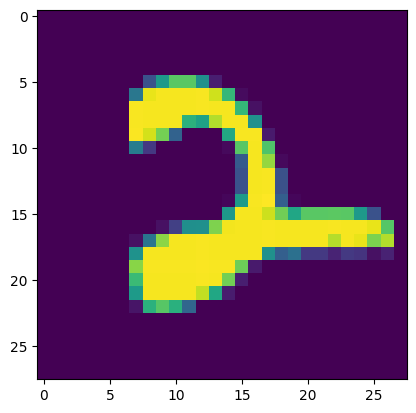

tensor(2)


In [25]:
plt.imshow(X[1].view(28,28))
plt.show()
 
print(torch.argmax(model(X[1].view(-1, 784))[0]))

В ответ должна отобразиться цифра, которая изображена на переданной картинке.

#### **Итоговый скрипт**

Наглядно увидеть работу нейронной сети можно, запустив наш полученный скрипт:

tensor(0.2341, grad_fn=<NllLossBackward0>)
tensor(0.0269, grad_fn=<NllLossBackward0>)
tensor(1.0094, grad_fn=<NllLossBackward0>)
Accuracy: 96 %


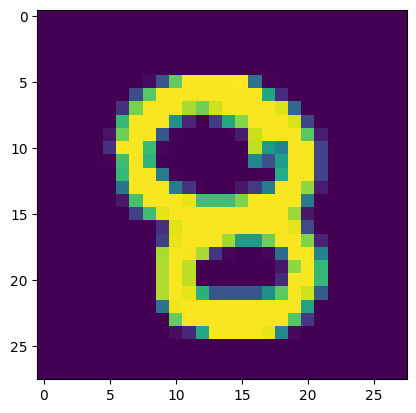

tensor(8)


In [30]:
import torch
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True,
                        transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                        transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=15, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=15, shuffle=True)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 86)
        self.fc2 = nn.Linear(86, 86)
        self.fc3 = nn.Linear(86, 86)
        self.fc4 = nn.Linear(86, 10)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
 
model = NeuralNetwork()

optimizer = optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        model.zero_grad()
        output = model(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        data_input, target = data
        output = model(data_input.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == target[idx]:
                correct += 1
            total += 1

print('Accuracy: %d %%' % (100 * correct / total))

plt.imshow(X[1].view(28,28))
plt.show()

print(torch.argmax(model(X[1].view(-1, 784))[0]))

При каждом запуске сеть будет брать случайную картинку из тестового набора и исследовать изображенную на ней цифру. После завершения работы отображается точность распознавания в процентах, сама картинка и та цифра, которую распознала нейронная сеть.